Nama: Ahmad Nasrudin Jamil

NIM : 210411100098

Kelas : Pencarian dan Penambangan Web B

# Vector Space Model

## Penjelasan

Vector Space Model (VSM) adalah pendekatan yang menggunakan vektor untuk merepresentasikan setiap kata dalam suatu ruang dimensi. Dalam VSM, dokumen dilihat sebagai vektor yang memiliki panjang (magnitudo) dan arah. Setiap kata dalam dokumen diwakili oleh sebuah dimensi dalam ruang vektor. Relevansi dokumen terhadap kueri dihitung berdasarkan kesamaan antara vektor dokumen dan vektor kueri.

VSM mendukung pencocokan parsial dengan menetapkan bobot non-biner pada kata-kata dalam dokumen dan kueri. Bobot tersebut digunakan untuk mengukur kesamaan antara dokumen yang tersimpan dan kueri pengguna. Dokumen yang ditemukan diurutkan berdasarkan tingkat kemiripannya, sehingga dokumen yang paling relevan ditampilkan lebih akurat sesuai dengan kebutuhan pengguna.

Berikut secara rinci langkah-langkah dan konsep di balik VSM:

 1. **Dokumen dan Kueri sebagai Vektor**
Pada dasarnya, setiap dokumen atau kueri direpresentasikan sebagai sebuah vektor. Namun, vektor ini tidak seperti vektor geometris biasa, tetapi memiliki dimensi sebanyak jumlah kata unik (vocabulary) dalam koleksi dokumen. Setiap dimensi dalam vektor mewakili satu kata atau istilah dari koleksi.

- **Dimensi Vektor**: Jika kita memiliki sebuah kumpulan dokumen yang terdiri dari 1.000 kata unik, maka setiap dokumen dan kueri akan direpresentasikan oleh vektor dengan 1.000 dimensi.
- **Isi Vektor**: Setiap elemen dalam vektor merepresentasikan bobot dari sebuah kata dalam dokumen tertentu. Sebagai contoh, jika kata "AI" muncul dalam dokumen, maka elemen yang merepresentasikan kata "AI" akan memiliki nilai lebih besar dari nol, sedangkan kata-kata yang tidak muncul akan bernilai nol.

Contoh representasi sederhana:
- Dokumen 1: "Belajar AI adalah masa depan"
- Dokumen 2: "AI bisa menggantikan manusia"
- Kueri: "AI dan masa depan"

Vektor untuk Dokumen 1 mungkin tampak seperti:
`(1, 1, 1, 1, 0)` untuk kata-kata `("Belajar", "AI", "adalah", "masa", "depan")`, di mana angka 1 menunjukkan bahwa kata tersebut muncul sekali.

2. **Pembobotan Kata (Term Weighting)**
Dalam VSM, tidak semua kata memiliki nilai yang sama. Untuk membuat model lebih efisien dalam menangkap kata-kata penting, VSM biasanya menggunakan teknik **pembobotan**. Teknik yang paling umum adalah **TF-IDF (Term Frequency - Inverse Document Frequency)**. TF-IDF membantu menghitung seberapa penting sebuah kata dalam sebuah dokumen dibandingkan dengan seluruh kumpulan dokumen.

- **Term Frequency (TF)**: Ini adalah jumlah kemunculan sebuah kata dalam dokumen. Semakin sering sebuah kata muncul, semakin besar bobot TF-nya. Namun, sering kali kita menggunakan versi termodifikasi seperti TF relatif (jumlah kemunculan kata dibagi total kata dalam dokumen).
- **Inverse Document Frequency (IDF)**: Kata yang sering muncul di seluruh dokumen (misalnya "adalah" atau "dan") biasanya kurang informatif, sehingga diberi bobot lebih rendah. IDF membantu mengurangi bobot kata-kata yang terlalu umum dengan menghitung kebalikan dari frekuensi dokumen yang mengandung kata tersebut.

Formula umum untuk TF-IDF:

$$\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \log\left(\frac{N}{\text{DF}(t)}\right)$$

Di mana:
- $(t)$ adalah kata (term)
- $(d)$ adalah dokumen
- $(N)$ adalah jumlah total dokumen
- $(DF(t))$ adalah jumlah dokumen yang mengandung kata \(t\)

Dengan TF-IDF, kata yang unik untuk sebuah dokumen (misalnya istilah teknis atau nama produk) akan memiliki bobot lebih tinggi dibandingkan dengan kata-kata yang umum di seluruh dokumen.

3. **Menghitung Kesamaan Antar Dokumen**
Setelah setiap dokumen dan kueri direpresentasikan sebagai vektor, kita bisa menghitung **kesamaan** antar dua vektor (dokumen atau dokumen-kueri). Salah satu metode paling umum adalah **Cosine Similarity**.

- **Cosine Similarity**: Ini adalah ukuran yang menghitung sudut antara dua vektor dalam ruang multidimensi. Semakin kecil sudutnya, semakin dekat atau mirip dua vektor tersebut. Nilai cosine similarity berkisar dari 0 (tidak mirip sama sekali) hingga 1 (sangat mirip).

Formula cosine similarity:

$$ \text{cosine\_similarity}(A, B) = \frac{A \cdot B}{||A|| \cdot ||B||} $$

Di mana:
- $(A \cdot B)$ adalah dot product dari vektor A dan B (hasil perkalian elemen-elemen vektor yang sesuai)
- $(||A||)$ dan $(||B||)$ adalah norma (panjang) dari vektor A dan B

Dengan menghitung cosine similarity, kita dapat mengetahui seberapa mirip dokumen dengan kueri. Jika nilai cosine similarity tinggi, berarti dokumen tersebut lebih relevan dengan kueri, sehingga dokumen tersebut dapat ditempatkan di urutan yang lebih tinggi dalam hasil pencarian.

4. **Pengurutan Dokumen**
Setelah kita menghitung cosine similarity antara kueri dan setiap dokumen dalam koleksi, dokumen-dokumen tersebut bisa diurutkan berdasarkan nilai similarity dari yang tertinggi ke yang terendah. Hasil ini bisa digunakan dalam **sistem pencarian** untuk menampilkan dokumen yang paling relevan di posisi teratas.

5. **Keuntungan dan Keterbatasan VSM**
**Keuntungan**:
- **Sederhana dan Efisien**: VSM mudah diimplementasikan dan cukup efisien dalam menangani koleksi dokumen besar.
- **Penanganan Sinonim dan Polisemik Terbatas**: Meski VSM sederhana, ia tidak menangani masalah sinonim (kata-kata berbeda dengan makna sama) dan polisemik (kata yang sama dengan makna berbeda) dengan baik.

**Keterbatasan**:
- **Kata-Kata Independen**: VSM mengasumsikan bahwa kata-kata dalam dokumen tidak memiliki hubungan satu sama lain, sehingga konteks sering kali hilang. Misalnya, frase "tidak setuju" akan diperlakukan sebagai dua kata terpisah, meskipun maknanya berubah ketika digabungkan.
- **Dimensi yang Tinggi**: Ketika bekerja dengan kumpulan dokumen besar, jumlah kata yang unik bisa sangat banyak, menyebabkan vektor memiliki dimensi yang sangat tinggi, yang dapat menyebabkan masalah performa.

**Contoh Sederhana**:

Misalkan kita memiliki tiga dokumen:
1. "Belajar AI adalah masa depan"
2. "AI bisa menggantikan manusia"
3. "Manusia belajar dari AI masa depan"

Jika kuerinya adalah "belajar AI", kita bisa menghitung cosine similarity antara kueri dan setiap dokumen. Dokumen dengan cosine similarity tertinggi adalah dokumen yang paling relevan dengan kueri.

**Kesimpulan**
Vector Space Model (VSM) adalah pendekatan sederhana namun sangat efektif untuk merepresentasikan dokumen dan kueri dalam ruang vektor, memungkinkan pencarian dan pengurutan dokumen berdasarkan kesamaan konten. Meskipun ada beberapa keterbatasan, VSM masih digunakan secara luas dalam sistem pencarian informasi, terutama ketika dipadukan dengan teknik pembobotan seperti TF-IDF.

## Implementasi

### Library yang digunakan

In [ ]:
!pip install gdown

  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)


In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\EBC
[nltk_data]     KOMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Ganti dengan ID file Anda
file_id = '13CkN5K_Bfo_V1-dTYulHoUeWClIA3s9f'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'crawling_2_kategori.csv'

# Unduh file dari Google Drive
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=13CkN5K_Bfo_V1-dTYulHoUeWClIA3s9f
To: C:\Users\EBC KOMPUTER\Documents\Jupyter Notebook\PPW\Tugas 2\crawling_2_kategori.csv
100%|███████████████████████████████████████████████████████████████████████████████| 253k/253k [00:00<00:00, 2.37MB/s]


'crawling_2_kategori.csv'

In [ ]:
# Membaca file CSV ke DataFrame
df = pd.read_csv(output)

### Dataset

In [ ]:
df

,title,content,date,category
0,"Jadwal Pendaftaran STIS 2025, Siswa Kelas 12 S...",KOMPAS.com - Masuk Sekolah Tinggi Ilmu Statist...,11/09/2024,Edu
1,PKKMB UDB Surakarta Gandeng Kompas.com Asah Ke...,KOMPAS.com - Fakultas Hukum dan Bisnis Univers...,11/09/2024,Edu
2,"Mahasiswa Unesa, Raih Medali Emas untuk Indone...",KOMPAS.com - Mahasiswa Universitas Negeri Sura...,11/09/2024,Edu
3,"Rayakan HUT ke-30, Sekolah Bogor Raya Luncurka...","KOMPAS.com - Merayakan hari ulang tahun ke-30,...",11/09/2024,Edu
4,"Sambut Mahasiswa Baru, Podomoro University Ber...",KOMPAS.com - Podomoro University menggelar pro...,11/09/2024,Edu
...,...,...,...,...
95,Diabetes Tidak Boleh Makan Buah Apa? Berikut 5...,KOMPAS.com - Beberapa jenis buah memiliki kand...,08/09/2024,Health
96,Apa Penyebab Badan Terasa Lemas? Berikut 29 Da...,KOMPAS.com - Badan yang terasa lemas bisa bera...,08/09/2024,Health
97,"8 Manfaat Nanas untuk Kesehatan, Termasuk Menu...",KOMPAS.com - Buah nanas memiliki beberapa jeni...,08/09/2024,Health
98,Apa yang Terjadi jika Konsumsi Garam Terlalu B...,KOMPAS.com - Tubuh Anda bisa mengalami berbaga...,07/09/2024,Health


### Jumlah Dataset Per Label

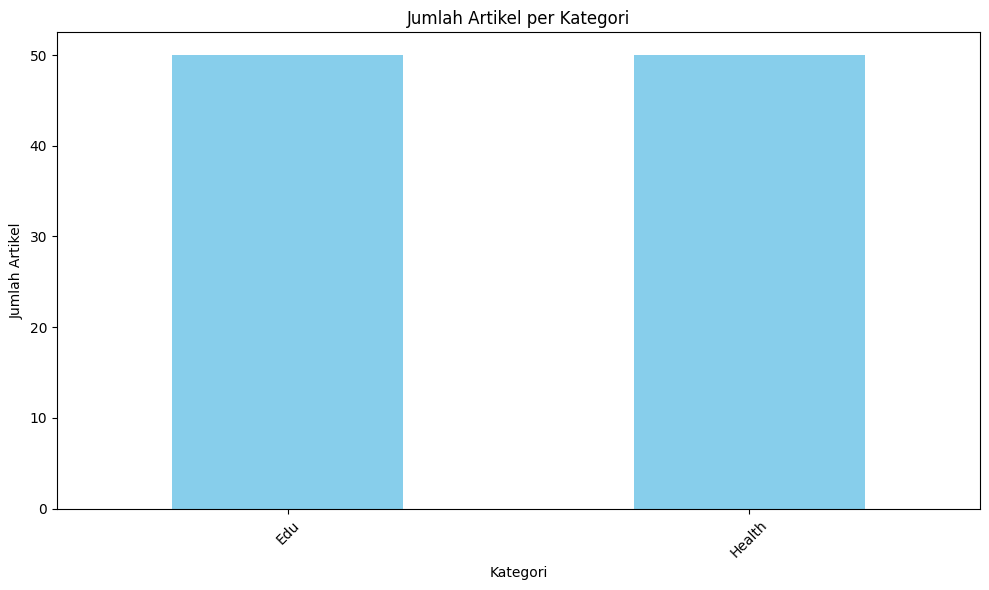

In [ ]:
# Hitung jumlah artikel per kategori
category_counts = df['category'].value_counts()

# Tampilkan grafik batang
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Artikel per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Preprocessing

#### Lower Case

In [ ]:
df['lower_text'] = df['content'].str.lower()

df[['content', 'lower_text']]

,content,lower_text
0,KOMPAS.com - Masuk Sekolah Tinggi Ilmu Statist...,kompas.com - masuk sekolah tinggi ilmu statist...
1,KOMPAS.com - Fakultas Hukum dan Bisnis Univers...,kompas.com - fakultas hukum dan bisnis univers...
2,KOMPAS.com - Mahasiswa Universitas Negeri Sura...,kompas.com - mahasiswa universitas negeri sura...
3,"KOMPAS.com - Merayakan hari ulang tahun ke-30,...","kompas.com - merayakan hari ulang tahun ke-30,..."
4,KOMPAS.com - Podomoro University menggelar pro...,kompas.com - podomoro university menggelar pro...
...,...,...
95,KOMPAS.com - Beberapa jenis buah memiliki kand...,kompas.com - beberapa jenis buah memiliki kand...
96,KOMPAS.com - Badan yang terasa lemas bisa bera...,kompas.com - badan yang terasa lemas bisa bera...
97,KOMPAS.com - Buah nanas memiliki beberapa jeni...,kompas.com - buah nanas memiliki beberapa jeni...
98,KOMPAS.com - Tubuh Anda bisa mengalami berbaga...,kompas.com - tubuh anda bisa mengalami berbaga...


#### Cleansing Text

In [ ]:
df['cleaned_text'] = df['lower_text'].apply(lambda text: re.sub(r'[^a-zA-Z]', ' ', text))

df[['lower_text', 'cleaned_text']]

,lower_text,cleaned_text
0,kompas.com - masuk sekolah tinggi ilmu statist...,kompas com masuk sekolah tinggi ilmu statist...
1,kompas.com - fakultas hukum dan bisnis univers...,kompas com fakultas hukum dan bisnis univers...
2,kompas.com - mahasiswa universitas negeri sura...,kompas com mahasiswa universitas negeri sura...
3,"kompas.com - merayakan hari ulang tahun ke-30,...",kompas com merayakan hari ulang tahun ke 30 ...
4,kompas.com - podomoro university menggelar pro...,kompas com podomoro university menggelar pro...
...,...,...
95,kompas.com - beberapa jenis buah memiliki kand...,kompas com beberapa jenis buah memiliki kand...
96,kompas.com - badan yang terasa lemas bisa bera...,kompas com badan yang terasa lemas bisa bera...
97,kompas.com - buah nanas memiliki beberapa jeni...,kompas com buah nanas memiliki beberapa jeni...
98,kompas.com - tubuh anda bisa mengalami berbaga...,kompas com tubuh anda bisa mengalami berbaga...


#### Tokenisasi

In [ ]:
df['tokenized_text'] = df['cleaned_text'].apply(lambda text: text.split())

df[['cleaned_text', 'tokenized_text']]

,cleaned_text,tokenized_text
0,kompas com masuk sekolah tinggi ilmu statist...,"[kompas, com, masuk, sekolah, tinggi, ilmu, st..."
1,kompas com fakultas hukum dan bisnis univers...,"[kompas, com, fakultas, hukum, dan, bisnis, un..."
2,kompas com mahasiswa universitas negeri sura...,"[kompas, com, mahasiswa, universitas, negeri, ..."
3,kompas com merayakan hari ulang tahun ke 30 ...,"[kompas, com, merayakan, hari, ulang, tahun, k..."
4,kompas com podomoro university menggelar pro...,"[kompas, com, podomoro, university, menggelar,..."
...,...,...
95,kompas com beberapa jenis buah memiliki kand...,"[kompas, com, beberapa, jenis, buah, memiliki,..."
96,kompas com badan yang terasa lemas bisa bera...,"[kompas, com, badan, yang, terasa, lemas, bisa..."
97,kompas com buah nanas memiliki beberapa jeni...,"[kompas, com, buah, nanas, memiliki, beberapa,..."
98,kompas com tubuh anda bisa mengalami berbaga...,"[kompas, com, tubuh, anda, bisa, mengalami, be..."


#### Stopword Removal

In [ ]:
stop_words = set(stopwords.words('indonesian'))

df['no_stopwords_text'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

df[['tokenized_text', 'no_stopwords_text']]

,tokenized_text,no_stopwords_text
0,"[kompas, com, masuk, sekolah, tinggi, ilmu, st...","[kompas, com, masuk, sekolah, ilmu, statistik,..."
1,"[kompas, com, fakultas, hukum, dan, bisnis, un...","[kompas, com, fakultas, hukum, bisnis, univers..."
2,"[kompas, com, mahasiswa, universitas, negeri, ...","[kompas, com, mahasiswa, universitas, negeri, ..."
3,"[kompas, com, merayakan, hari, ulang, tahun, k...","[kompas, com, merayakan, ulang, 30, sekolah, b..."
4,"[kompas, com, podomoro, university, menggelar,...","[kompas, com, podomoro, university, menggelar,..."
...,...,...
95,"[kompas, com, beberapa, jenis, buah, memiliki,...","[kompas, com, jenis, buah, memiliki, kandungan..."
96,"[kompas, com, badan, yang, terasa, lemas, bisa...","[kompas, com, badan, lemas, berangsur, membaik..."
97,"[kompas, com, buah, nanas, memiliki, beberapa,...","[kompas, com, buah, nanas, memiliki, jenis, mi..."
98,"[kompas, com, tubuh, anda, bisa, mengalami, be...","[kompas, com, tubuh, mengalami, kondisi, menge..."


#### Stemming

In [ ]:
# Membuat objek Stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Menggunakan Sastrawi untuk stemming teks
df['stemmed_text'] = df['no_stopwords_text'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
df['final_text'] = df['stemmed_text'].apply(lambda x: ' '.join(x))

df[['no_stopwords_text', 'final_text']]

,no_stopwords_text,final_text
0,"[kompas, com, masuk, sekolah, ilmu, statistik,...",kompas com masuk sekolah ilmu statistik stis s...
1,"[kompas, com, fakultas, hukum, bisnis, univers...",kompas com fakultas hukum bisnis universitas d...
2,"[kompas, com, mahasiswa, universitas, negeri, ...",kompas com mahasiswa universitas negeri suraba...
3,"[kompas, com, merayakan, ulang, 30, sekolah, b...",kompas com raya ulang 30 sekolah bogor raya sb...
4,"[kompas, com, podomoro, university, menggelar,...",kompas com podomoro university gelar program k...
...,...,...
95,"[kompas, com, jenis, buah, memiliki, kandungan...",kompas com jenis buah milik kandung gula tingk...
96,"[kompas, com, badan, lemas, berangsur, membaik...",kompas com badan lemas angsur baik jangka seba...
97,"[kompas, com, buah, nanas, memiliki, jenis, mi...",kompas com buah nanas milik jenis mineral zat ...
98,"[kompas, com, tubuh, mengalami, kondisi, menge...",kompas com tubuh alami kondisi kena konsumsi g...


In [ ]:
x = df['content'].values
y = df['category'].values

### TF-IDF

In [ ]:
vect = TfidfVectorizer()
X = vect.fit_transform(x)

X_array = vect.transform(x)

In [ ]:
print(X_array.toarray())

[[0.03312885 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03599698 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
fitur_kata = vect.get_feature_names_out()

print("Jumlah fitur kata dari hasil TF-IDF:", len(fitur_kata))

Jumlah fitur kata dari hasil TF-IDF: 4743


### Cossine Similiarity

In [ ]:
cosine_sim = cosine_similarity(X)

# Langkah 4: Menyusun DataFrame untuk menampilkan hasil cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['category'], columns=df['category'])

# Menampilkan beberapa baris dari matriks cosine similarity
print(cosine_sim_df.head())

category       Edu       Edu       Edu       Edu       Edu       Edu  \
category                                                               
Edu       1.000000  0.091693  0.077027  0.127135  0.068241  0.107589   
Edu       0.091693  1.000000  0.119180  0.090717  0.284201  0.115269   
Edu       0.077027  0.119180  1.000000  0.060997  0.104898  0.046514   
Edu       0.127135  0.090717  0.060997  1.000000  0.072921  0.102683   
Edu       0.068241  0.284201  0.104898  0.072921  1.000000  0.074666   

category       Edu       Edu       Edu       Edu  ...    Health    Health  \
category                                          ...                       
Edu       0.268005  0.076923  0.124029  0.076964  ...  0.047007  0.040384   
Edu       0.056911  0.112718  0.052267  0.137848  ...  0.047570  0.052708   
Edu       0.067137  0.091481  0.211862  0.107909  ...  0.032137  0.024289   
Edu       0.042622  0.048685  0.078675  0.063733  ...  0.034082  0.034648   
Edu       0.055064  0.168138  0.0

## Penjelasan Code

Baik, mari kita uraikan kode secara rinci, dengan fokus pada setiap bagian untuk menjelaskan cara kerjanya dan tujuannya.

### 1. **Import Library**
   ```python
   import gdown
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   from nltk.corpus import stopwords
   from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
   import re
   from sklearn.feature_extraction.text import TfidfVectorizer
   from sklearn.metrics.pairwise import cosine_similarity
   import nltk
   nltk.download('stopwords')
   ```

   **Penjelasan**:
   - **`gdown`**: Digunakan untuk mengunduh file dari Google Drive.
   - **`pandas` (`pd`) & `numpy` (`np`)**: `pandas` untuk manipulasi data dalam bentuk tabel (DataFrame), sedangkan `numpy` untuk operasi numerik.
   - **`matplotlib.pyplot` (`plt`)**: Digunakan untuk membuat visualisasi grafik, seperti grafik batang.
   - **`nltk.corpus.stopwords`**: Mengimpor daftar stopwords (kata-kata umum yang tidak penting seperti "dan", "di", "untuk") untuk dihilangkan dari teks.
   - **`Sastrawi`**: Untuk stemming (mengubah kata menjadi bentuk dasar, misalnya "bermain" menjadi "main").
   - **`re`**: Ekspresi reguler, digunakan untuk membersihkan teks (misalnya menghilangkan karakter non-alfabet).
   - **`TfidfVectorizer`**: Mengubah teks menjadi representasi numerik berdasarkan TF-IDF.
   - **`cosine_similarity`**: Menghitung kemiripan kosinus antara teks.

   Bagian ini mengimpor semua alat yang diperlukan untuk proses unduhan, pemrosesan teks, analisis, dan visualisasi.

---

### 2. **Mengunduh File CSV dari Google Drive**
   ```python
   file_id = '13CkN5K_Bfo_V1-dTYulHoUeWClIA3s9f'
   url = f'https://drive.google.com/uc?id={file_id}'
   output = 'crawling_2_kategori.csv'

   gdown.download(url, output, quiet=False)
   ```

   **Cara Kerja**:
   - `file_id` adalah ID file di Google Drive.
   - `url` dibentuk dengan menggabungkan ID file ke dalam format URL yang dapat digunakan untuk mengunduh file dari Google Drive.
   - `gdown.download(url, output, quiet=False)` mengunduh file dari URL dan menyimpannya dengan nama `crawling_2_kategori.csv`.

   Bagian ini digunakan untuk mengunduh file CSV yang berisi artikel yang akan dianalisis. Kode ini mengotomatisasi pengunduhan dari Google Drive.

---

### 3. **Membaca CSV ke dalam DataFrame**
   ```python
   df = pd.read_csv(output)
   ```

   **Cara Kerja**:
   - `pd.read_csv(output)` membaca file CSV yang diunduh dan memuatnya ke dalam DataFrame `df`.
   
   DataFrame adalah struktur data yang mirip tabel. Setiap kolom dalam CSV menjadi kolom dalam DataFrame, yang memudahkan manipulasi dan analisis data.

---

### 4. **Menghitung dan Menampilkan Jumlah Artikel per Kategori**
   ```python
   category_counts = df['category'].value_counts()

   plt.figure(figsize=(10, 6))
   category_counts.plot(kind='bar', color='skyblue')
   plt.title('Jumlah Artikel per Kategori')
   plt.xlabel('Kategori')
   plt.ylabel('Jumlah Artikel')
   plt.xticks(rotation=45)
   plt.tight_layout()
   plt.show()
   ```

   **Cara Kerja**:
   - `df['category'].value_counts()` menghitung berapa kali setiap kategori muncul dalam kolom `category`.
   - `plt.figure(figsize=(10, 6))` membuat kanvas untuk plot dengan ukuran tertentu.
   - `category_counts.plot(kind='bar', color='skyblue')` membuat grafik batang dengan warna 'skyblue'.
   - `plt.title()`, `plt.xlabel()`, dan `plt.ylabel()` menambahkan judul dan label sumbu.
   - `plt.xticks(rotation=45)` memutar label sumbu x sebesar 45 derajat untuk keterbacaan.
   - `plt.tight_layout()` mengatur layout agar lebih rapi, dan `plt.show()` menampilkan plot.

   Visualisasi ini digunakan untuk melihat jumlah artikel dalam setiap kategori secara sekilas. Grafik batang memudahkan identifikasi kategori yang dominan.

---

### 5. **Proses Pembersihan Teks**
   - **Konversi Teks ke Huruf Kecil**:
     ```python
     df['lower_text'] = df['content'].str.lower()
     ```
     Semua teks di kolom `content` diubah menjadi huruf kecil. Hal ini penting agar proses selanjutnya konsisten, karena dalam pemrosesan teks, huruf besar dan kecil dianggap berbeda.
   
   - **Pembersihan Teks dari Karakter Non-Alfabet**:
     ```python
     df['cleaned_text'] = df['lower_text'].apply(lambda text: re.sub(r'\W', ' ', text))
     ```
     Menggunakan ekspresi reguler `\W` untuk menghilangkan semua karakter non-alfabet (misalnya tanda baca dan angka) dan menggantinya dengan spasi. Ini membuat teks lebih bersih untuk analisis lebih lanjut.

   - **Tokenisasi (Memecah Teks Menjadi Kata-kata Terpisah)**:
     ```python
     df['tokenized_text'] = df['cleaned_text'].apply(lambda text: text.split())
     ```
     Memecah teks menjadi kata-kata individu menggunakan metode `split()`, sehingga setiap teks menjadi daftar kata.

   - **Menghilangkan Stopwords**:
     ```python
     stop_words = set(stopwords.words('indonesian'))
     df['no_stopwords_text'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
     ```
     Daftar kata umum yang tidak penting (stopwords) seperti "dan", "di", "untuk" dihapus dari teks. Ini membuat analisis lebih fokus pada kata kunci yang relevan.

   **Untuk apa**: Pembersihan teks adalah langkah penting dalam Natural Language Processing (NLP) untuk memastikan teks lebih konsisten, relevan, dan siap diproses lebih lanjut.

---

### 6. **Stemming (Mengubah Kata Menjadi Bentuk Dasar)**:
   ```python
   factory = StemmerFactory()
   stemmer = factory.create_stemmer()
   df['stemmed_text'] = df['no_stopwords_text'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
   df['final_text'] = df['stemmed_text'].apply(lambda x: ' '.join(x))
   ```

   **Cara Kerja**:
   - `StemmerFactory` digunakan untuk membuat objek stemmer yang akan mengubah kata menjadi bentuk dasarnya.
   - `df['stemmed_text']` melakukan stemming pada setiap kata dalam teks yang sudah dihapus stopwords-nya.
   - `df['final_text']` menggabungkan kata-kata hasil stemming kembali menjadi teks yang dapat dibaca.

   **Untuk apa**: Stemming mengurangi variasi kata yang memiliki makna sama (misalnya "bermain", "bermainan", "dimainkan" semuanya menjadi "main"). Ini membantu algoritma memahami makna teks dengan lebih baik.

---

### 7. **TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization**:
   ```python
   vect = TfidfVectorizer()
   X = vect.fit_transform(df['content'].values)
   fitur_kata = vect.get_feature_names_out()
   print("Jumlah fitur kata dari hasil TF-IDF:", len(fitur_kata))
   ```

   **Cara Kerja**:
   - `TfidfVectorizer()` mengubah teks menjadi representasi numerik berdasarkan frekuensi kemunculan kata. Kata yang muncul lebih sering dalam dokumen tertentu tapi jarang di korpus keseluruhan diberi bobot lebih tinggi.
   - `vect.fit_transform()` menerapkan TF-IDF pada teks dalam kolom `content`.
   - `vect.get_feature_names_out()` mengembalikan daftar kata unik yang digunakan sebagai fitur.

   TF-IDF digunakan untuk mewakili teks dalam bentuk vektor numerik. Ini adalah langkah penting dalam analisis teks berbasis machine learning.

---

### 8. **Cosine Similarity (Mengukur Kesamaan Teks)**:
   ```python
   cosine_sim = cosine_similarity(X)
   cosine_sim_df = pd.DataFrame(cosine_sim, index=df['category'], columns=df['category'])
   print(cosine_sim_df.head())
   ```

   **Cara Kerja**:
   - `cosine_similarity(X)` menghitung kemiripan kosinus antara teks-teks dalam dataset. Nilai kesamaan kosinus berkisar antara 0 hingga 1, di mana 1 berarti dua teks sangat mirip.
   - `cosine_sim_df` adalah DataFrame yang menyimpan hasil kesamaan kosinus antara kategori artikel.

    Cosine similarity digunakan untuk mengukur kesamaan antara dokumen teks berdasarkan representasi vektor TF-IDF. Ini berguna untuk menemukan artikel yang mirip atau mengelompokkan artikel berdasarkan kemiripannya.
